In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
from collections import Counter

In [2]:
train_data_dir = 'data/train'
train_labels_path = "data/labels.csv"

In [9]:
''' Plot functions '''
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(train_data_dir + "/" + filename + ".jpg") for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

In [10]:
train_df = pd.read_csv(train_labels_path)
train_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


In [12]:
train_df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,a9054d27b758b05eac6e483eba0f9f78,scottish_deerhound
freq,1,126


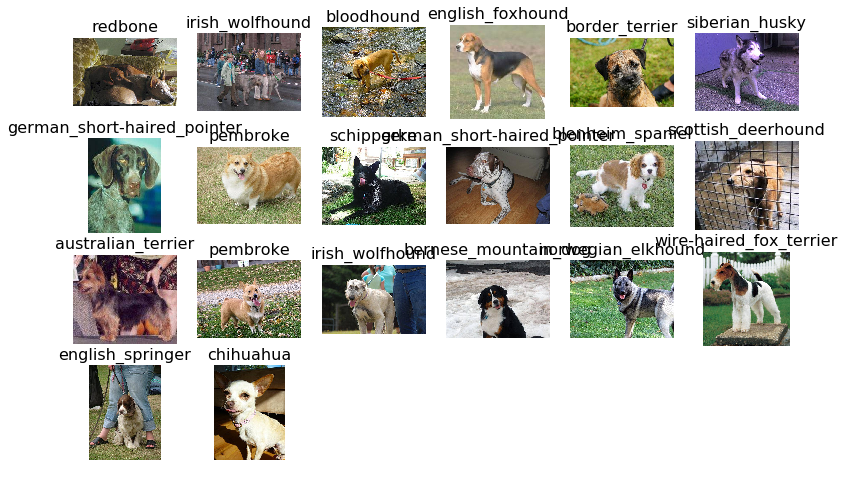

In [13]:
rand_rows = train_df.sample(frac=1.)[:20]
imgs = list(rand_rows['id'])
labels = list(rand_rows['breed'])

plot_images_for_filenames(imgs, labels)
plt.show()

Let's explore colours of images (gray, colour), by studying channels

In [21]:
def is_grey_scale(img_path):
    """https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path + ".jpg").convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

In [22]:
i = 0
nb_color = 0
nb_gray = 0
for img in train_df['id']:
    if i < 500:
        if is_grey_scale(train_data_dir + '/' + img):
            nb_gray += 1
        else:
            nb_color += 1
        i += 1
    else:
        break

In [23]:
print("Proportion d'images noir et blanc : ", nb_gray/(nb_color+nb_gray))

Proportion d'images noir et blanc :  0.004


Let's explore Image size

In [25]:
sizes = []
for img in train_df['id']:
    img = cv2.imread(train_data_dir + "/" + img + ".jpg")
    x = img.shape[0]
    y = img.shape[1]
    sizes.append((x, y))

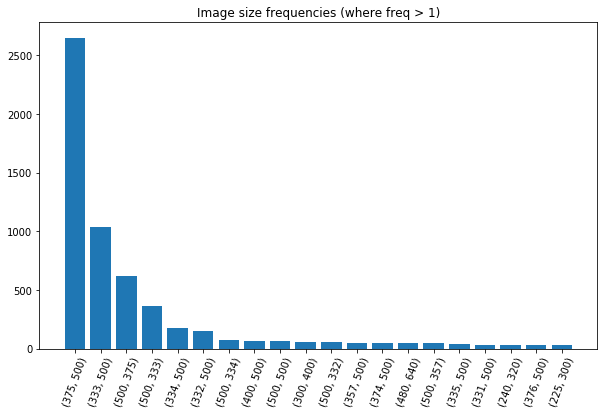

In [26]:
counter_size = Counter(sizes)
size, freq = zip(*Counter({i: v for i, v in counter_size.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")

plt.show()

Information on classes

In [27]:
nb_classes = len(train_df['breed'].unique())
print('Number of classes : ' + str(len(train_df['breed'])))
print('Number of unique classes : ' + str(nb_classes))

Number of classes : 10222
Number of unique classes : 120


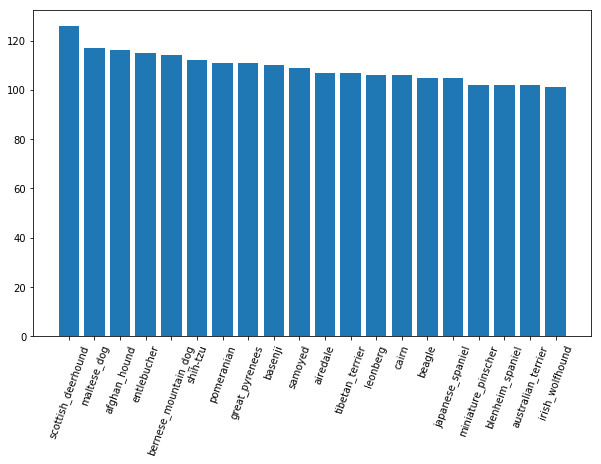

In [28]:
size_buckets = Counter(train_df['breed'])
size, freq = zip(*Counter({i: v for i, v in size_buckets.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)


plt.show()

In [30]:
train_df['breed'].value_counts().head(3)

scottish_deerhound    126
maltese_dog           117
afghan_hound          116
Name: breed, dtype: int64

In [31]:
train_df['breed'].value_counts().tail(3)

brabancon_griffon    67
briard               66
eskimo_dog           66
Name: breed, dtype: int64